In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    TFTT,
    TTFT,
    GenerousTFT,
    # GradualTFT,
    OmegaTFT,
    Davis,
    # Downing,
    # Feld,
    Grofman,
    # Grudger,
    # Joss,
    # Nydegger,
    # Shubik,
    SteinAndRapoport,
    # TidemanAndChieruzzi,
    # Tullock,
    # Pavlov
])

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, 6)
        self.layer2 = nn.Linear(6, 6)
        # self.layer3 = nn.Linear(6, 6)
        self.layer4 = nn.Linear(6, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    def __init__(self):
        super().__init__()

        self.lookback = 4
        self.epsilon = 0.2

        self._learning_rate = 0.05
        self._discount_rate = 0.95
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    limit=200,
    epochs=10,
)

[19:52:00] Commencement of training.
[19:52:02] Completed epoch 1: 2.095205191255159
[19:52:05] Completed epoch 2: 2.1441650956275793
[19:52:07] Completed epoch 3: 2.14204756375172
[19:52:09] Completed epoch 4: 2.1413012978137895
[19:52:11] Completed epoch 5: 2.1380410382510315
[19:52:13] Completed epoch 6: 2.1393571152091932
[19:52:16] Completed epoch 7: 2.1499846701793084
[19:52:18] Completed epoch 8: 2.151197523906895
[19:52:20] Completed epoch 9: 2.1185991879172397
[19:52:23] Completed epoch 10: 2.123676769125516


In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=8, out_features=6, bias=True)
  (layer2): Linear(in_features=6, out_features=6, bias=True)
  (layer4): Linear(in_features=6, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 14193, <Action.DEFECT: 1>: 1807}
{<Action.COOPERATE: 0>: 0.8870625, <Action.DEFECT: 1>: 0.1129375}


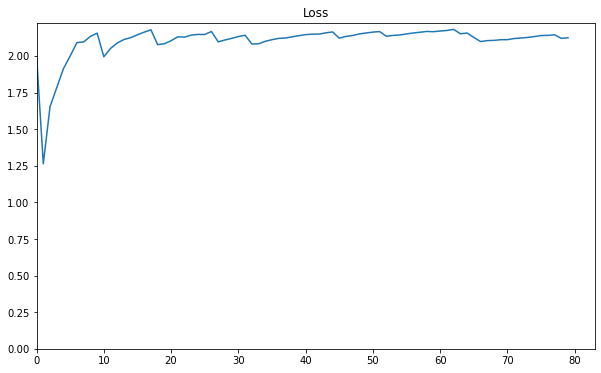

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

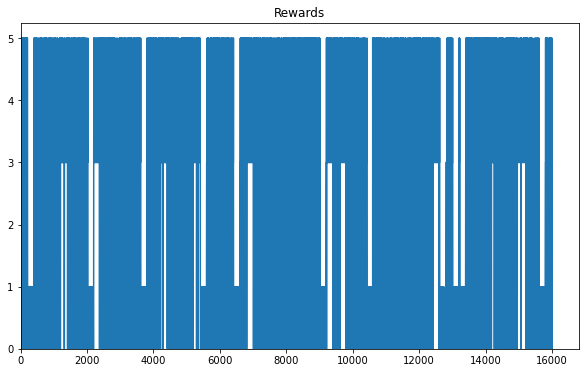

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

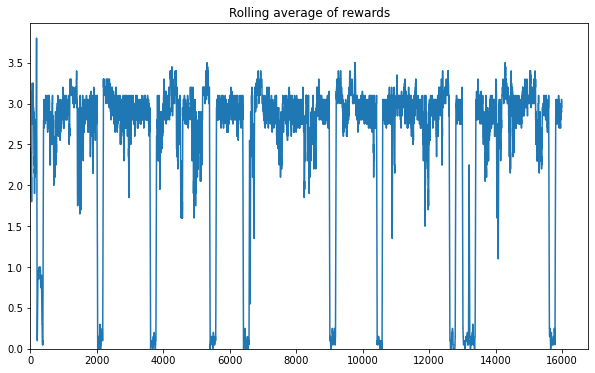

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

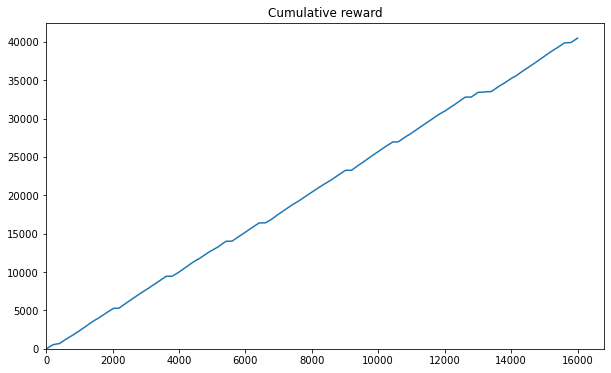

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

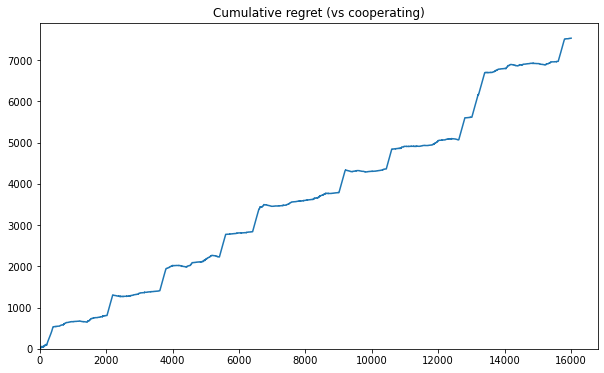

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.751875, <Action.DEFECT: 1>: 0.248125}, {<Action.COOPERATE: 0>: 0.9, <Action.DEFECT: 1>: 0.1}, {<Action.COOPERATE: 0>: 0.906875, <Action.DEFECT: 1>: 0.093125}, {<Action.COOPERATE: 0>: 0.8975, <Action.DEFECT: 1>: 0.1025}, {<Action.COOPERATE: 0>: 0.900625, <Action.DEFECT: 1>: 0.099375}, {<Action.COOPERATE: 0>: 0.89125, <Action.DEFECT: 1>: 0.10875}, {<Action.COOPERATE: 0>: 0.91625, <Action.DEFECT: 1>: 0.08375}, {<Action.COOPERATE: 0>: 0.90375, <Action.DEFECT: 1>: 0.09625}, {<Action.COOPERATE: 0>: 0.896875, <Action.DEFECT: 1>: 0.103125}, {<Action.COOPERATE: 0>: 0.905625, <Action.DEFECT: 1>: 0.094375}]


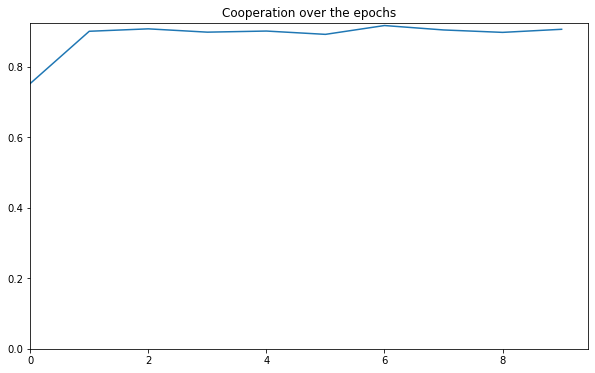

In [11]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [12]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [13]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=8, out_features=6, bias=True)
  (layer2): Linear(in_features=6, out_features=6, bias=True)
  (layer4): Linear(in_features=6, out_features=2, bias=True)
)

In [14]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [01:18<00:00, 12.19matches/s] 

Weiner                 815                  19.018036999999996  
Champion                       805                  33.57207999999999   
Borufsen                       805                  7.576033000000001   
OmegaTFT                       800                  7.7200370000000005  
White              800                  7.702985000000001   
TTFT                           792                  6.849991000000001   
GenerousTFT                    790                  6.553005999999996   
QLearningTest                  787                  61.47054399999998   
SteinAndRapoport               779                  20.967998           
Pavlov                         774                  6.900981000000001   
TitForTat                      771                  6.399987            
Davis                          771                  10.741056000000004  
Shubik                         768                  6.588024000000002   
TidemanAndChieruzzi            767                  7.984008999999999  